# Exploring the data

## 1- Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts


In [2]:
# setting plt layout
plt.ion()

## 2- Importing data

In [3]:
dataset = pd.read_csv('C:/Users/matlp/Desktop/Nova Pasta/KaggleBC/data.csv')

### Just a glimpse

In [4]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Splitting independent and target variables

In [5]:
X = dataset
X = X.drop(X.columns[[1, 32]], axis=1)
y = dataset[['diagnosis']]

In [6]:
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


#### processing target variable

M = 1,
B = 0

In [8]:
y = y.replace('M', 1).replace('B', 0)


In [9]:
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


## 3- Here we go!

### Correlation

#### Independent variables (heatmap)

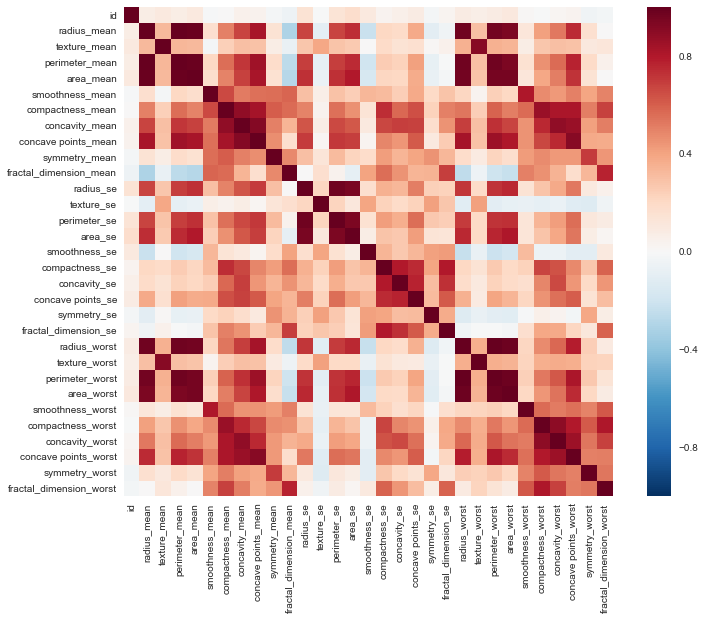

In [10]:
## correlation between variables

corre = X.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corre, vmax=1, square=True);

Dropping radius and perimeter variables, since their information is contained in area values

In [11]:
X = X.drop(X.filter(regex='^(?=(radius|perimeter)).*', axis=1).columns, axis=1)


In [12]:
X.head()

,id,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.9053,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.7339,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7869,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,20.38,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1.1560,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7813,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


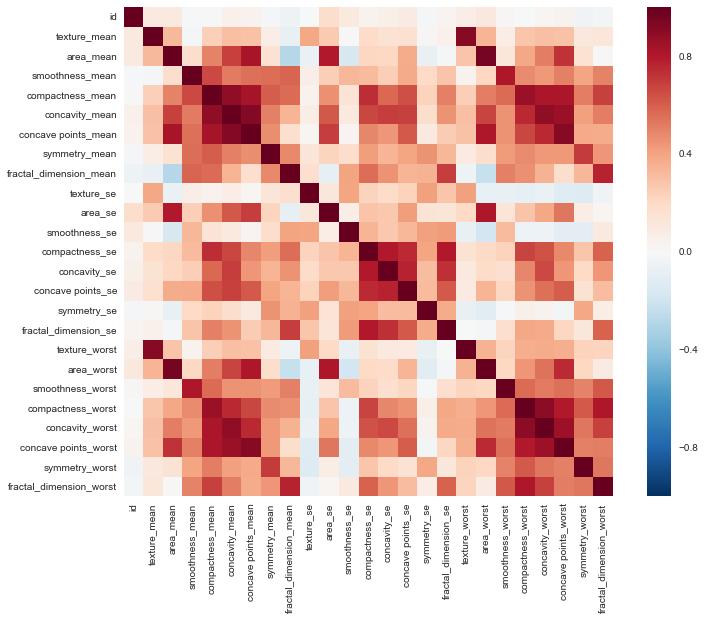

In [13]:
## correlation between variables

corre = X.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corre, vmax=1, square=True);

##### Splitting CV and test datasets

Further analysis will be based only on CV

In [14]:
## Separating CV and test datasets
X_cv, X_test, y_cv, y_test = tts(X, y, test_size = 0.2, random_state=1)

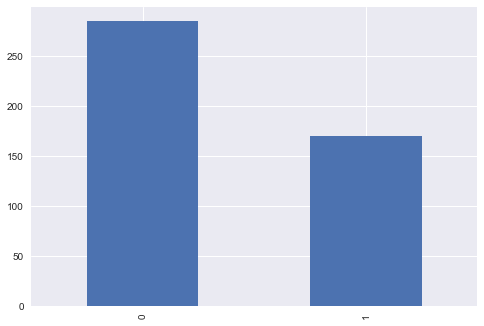

In [15]:
y_cv['diagnosis'].value_counts().plot.bar()

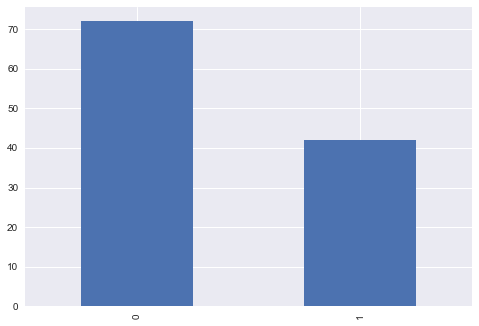

In [16]:
y_test['diagnosis'].value_counts().plot.bar()

#### Box plot between target and independent variables

Information for axis settings

In [17]:
X_cv.describe()

,id,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.550000e+02,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.494429e+07,19.354374,664.583077,0.096372,0.105059,0.089651,0.049590,0.181131,0.062720,1.224767,...,0.020515,0.003821,25.705165,900.190549,0.132138,0.256131,0.272104,0.115820,0.288476,0.083636
std,1.387826e+08,4.399626,362.603052,0.013746,0.051977,0.080264,0.039412,0.027257,0.006718,0.574930,...,0.008278,0.002769,6.289274,595.178062,0.022190,0.154821,0.204274,0.067030,0.058845,0.016646
min,8.670000e+03,9.710000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.050240,0.360200,...,0.009539,0.000895,12.020000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,8.695835e+05,16.170000,421.950000,0.086730,0.065880,0.028860,0.020335,0.162000,0.058020,0.828350,...,0.015095,0.002262,20.970000,511.050000,0.117850,0.149650,0.110900,0.064985,0.250800,0.072090
50%,9.059780e+05,18.870000,551.100000,0.096390,0.096610,0.063870,0.034830,0.179900,0.061660,1.083000,...,0.018750,0.003187,25.270000,684.600000,0.131600,0.218600,0.232200,0.101000,0.281500,0.080090
75%,8.910375e+06,21.830000,801.550000,0.104900,0.130550,0.132350,0.074975,0.194900,0.066005,1.489500,...,0.023705,0.004570,29.915000,1122.500000,0.144800,0.341800,0.385700,0.166100,0.315200,0.091950
max,9.113205e+08,39.280000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.095750,4.885000,...,0.078950,0.029840,49.540000,4254.000000,0.222600,0.937900,1.170000,0.291000,0.577400,0.148600


##### 'Mean' features

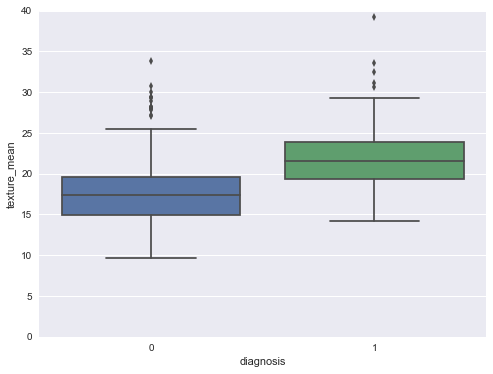

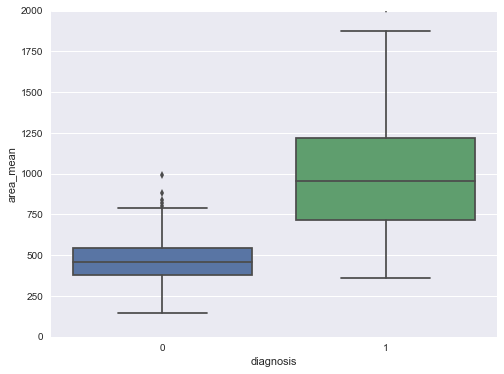

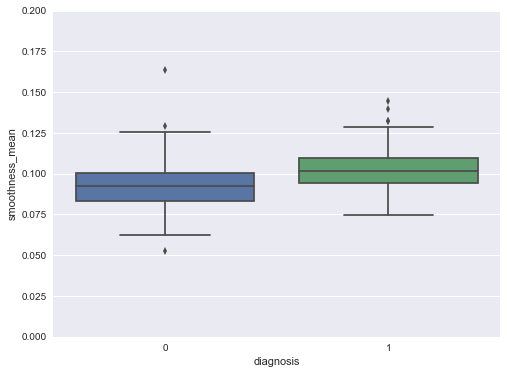

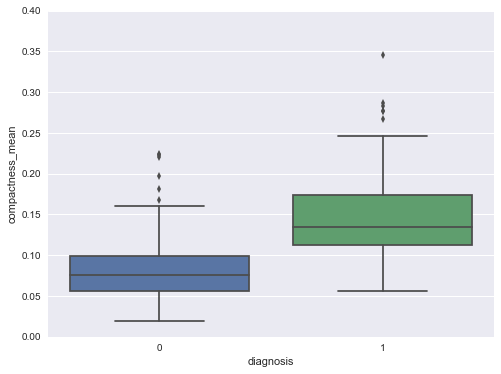

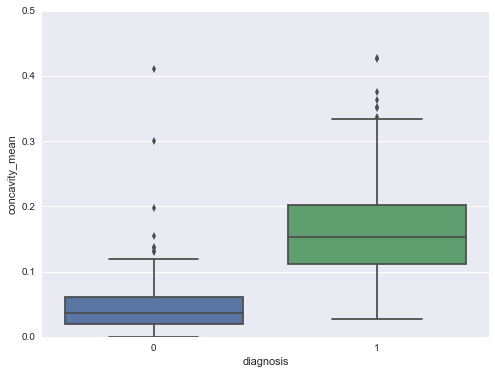

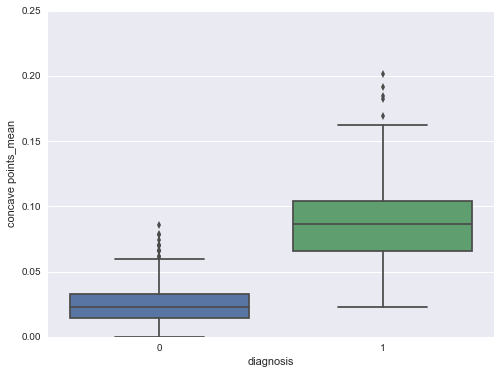

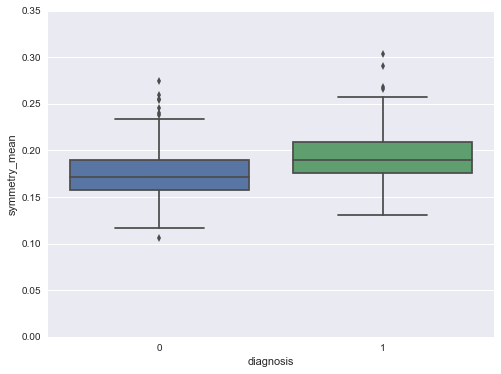

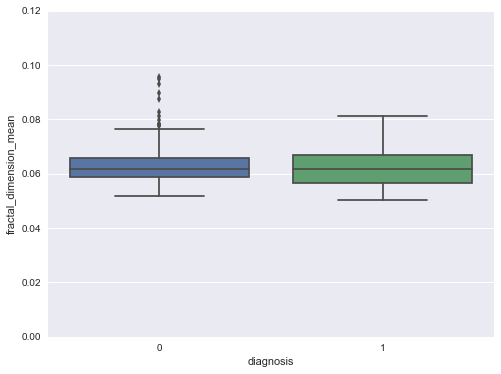

In [18]:
#box plot (means)
plt.figure(1)
var = 'texture_mean'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=40);

var = 'area_mean'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=2000);

var = 'smoothness_mean'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=0.2);

var = 'compactness_mean'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=0.4);

var = 'concavity_mean'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=0.5);

var = 'concave points_mean'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=0.25);

var = 'symmetry_mean'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=0.35);

var = 'fractal_dimension_mean'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=0.12);

##### Conclusion

Considerable: texture_means (higher), area_means (higher), compactness_mean (higher), concavity_mean (higher), concave_point_mean (higher)

Not significant: fractal_dimension

##### 'Standard error' features

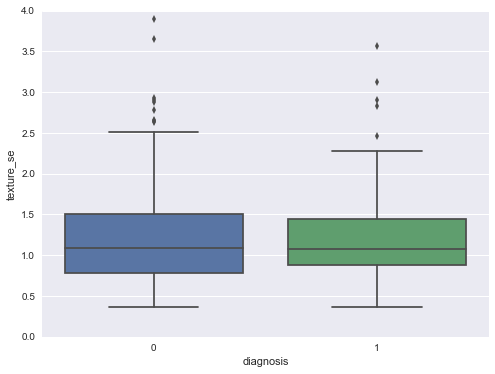

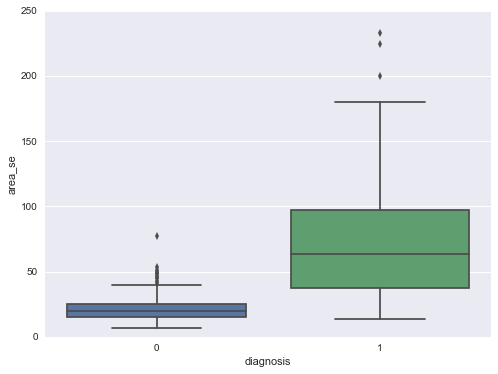

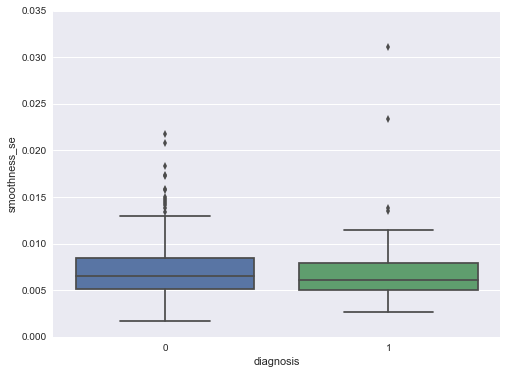

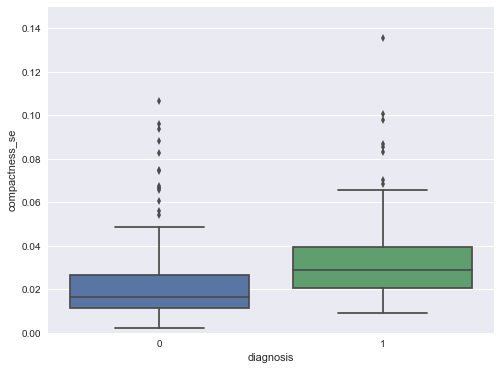

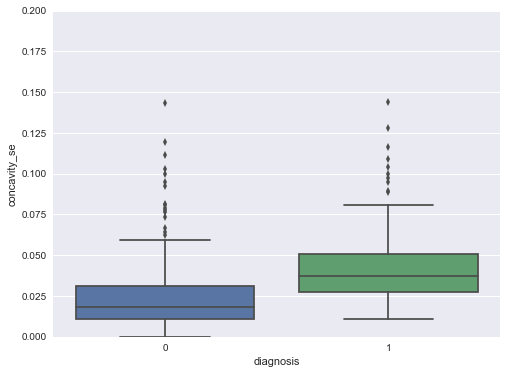

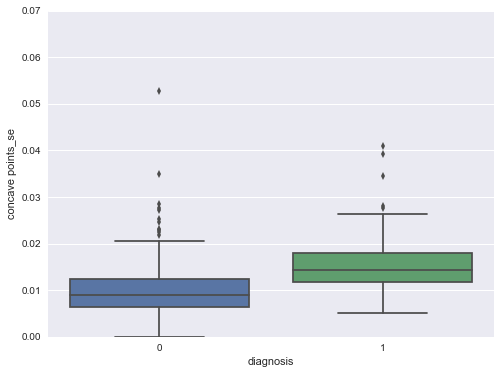

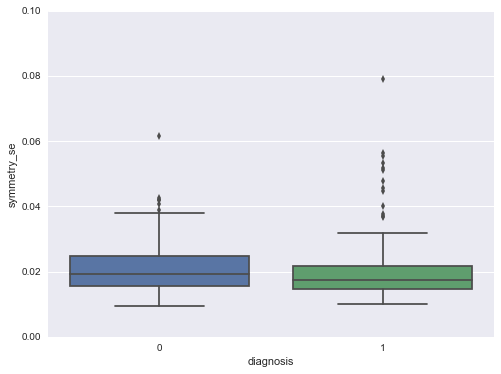

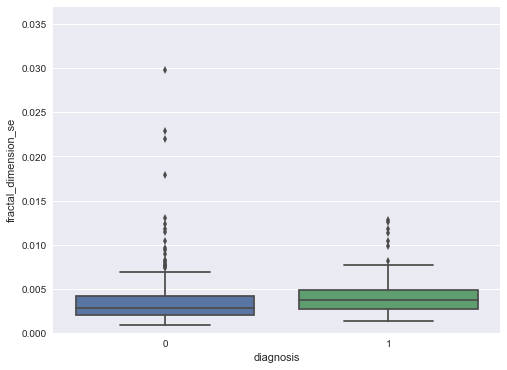

In [19]:
#box plot (SE)
plt.figure(1)
var = 'texture_se'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=4);

var = 'area_se'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=250);

var = 'smoothness_se'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=0.035);

var = 'compactness_se'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=0.15);

var = 'concavity_se'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=0.2);

var = 'concave points_se'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=0.07);

var = 'symmetry_se'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=0.1);

var = 'fractal_dimension_se'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=0.037);

##### Conclusion

Considerable: area_se (higher), compactness_se (higher), concavity_se (higher)

##### 'Worst' features

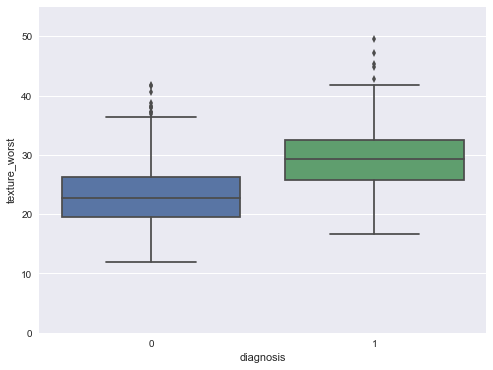

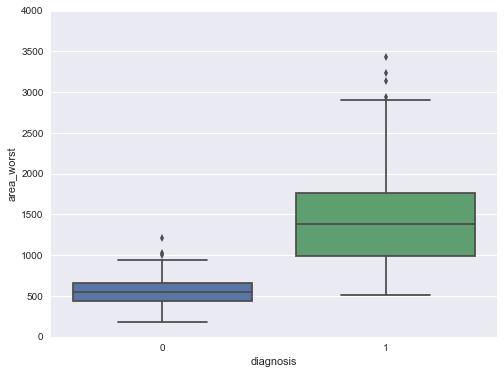

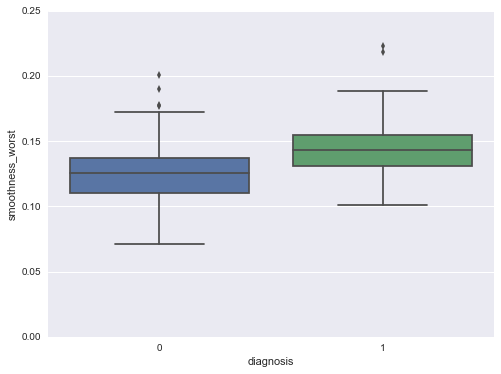

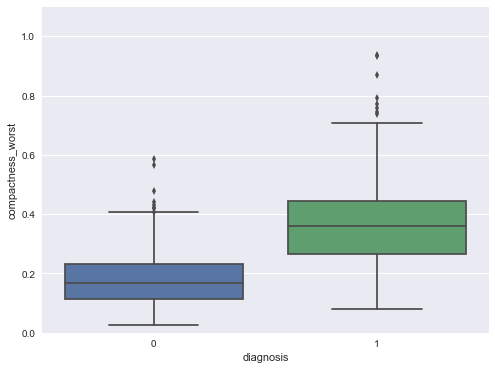

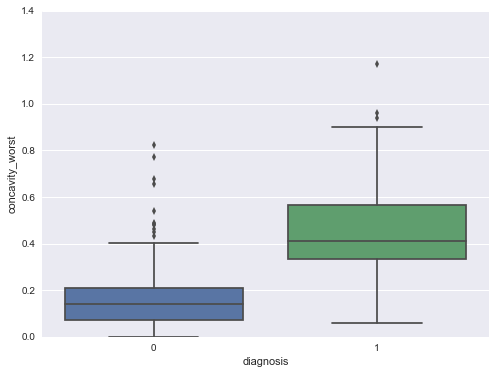

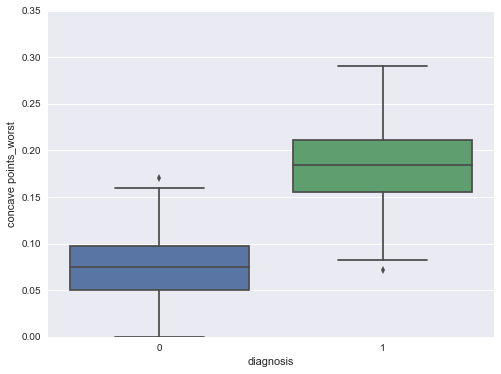

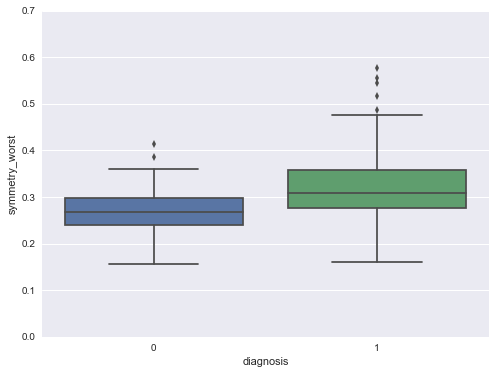

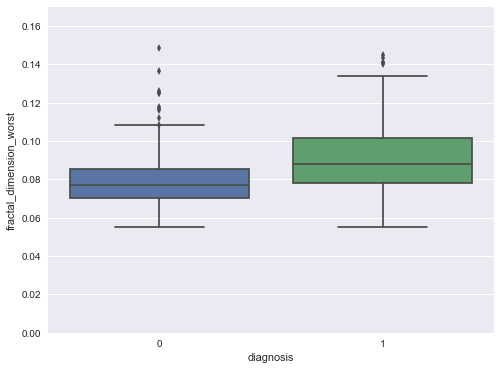

In [20]:
#box plot (worst)
plt.figure(1)
var = 'texture_worst'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=55);

var = 'area_worst'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=4000);

var = 'smoothness_worst'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=0.25);

var = 'compactness_worst'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=1.1);

var = 'concavity_worst'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=1.4);

var = 'concave points_worst'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=0.35);

var = 'symmetry_worst'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=0.7);

var = 'fractal_dimension_worst'
data = pd.concat([X_cv[var], y_cv['diagnosis']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='diagnosis', y=var, data=data)
fig.axis(ymin=0, ymax=0.17);

##### Conclusion

Considerable: all of them. texture_worst (higher), area_worst (higher), smoothness_worst (higher), compactness_worst (higher), concavity_worst (higher), concave point_worst (higher), symmetry_worst (higher), fractal_dimension_worst (higher)

#### Scatterplot Matrix

##### Means

Relatively relevant: area, compactness, concavity, concave points.
Irrelevant: texture, smoothness, symmetry, fractal dimension

##### SE

Relatively relevant: area
Irrelevant: rest

##### Worst

Relatively relevant: area, compactness, concavity, concave points.
Irrelevant: texture, smoothness, symmetry, fractal dimension


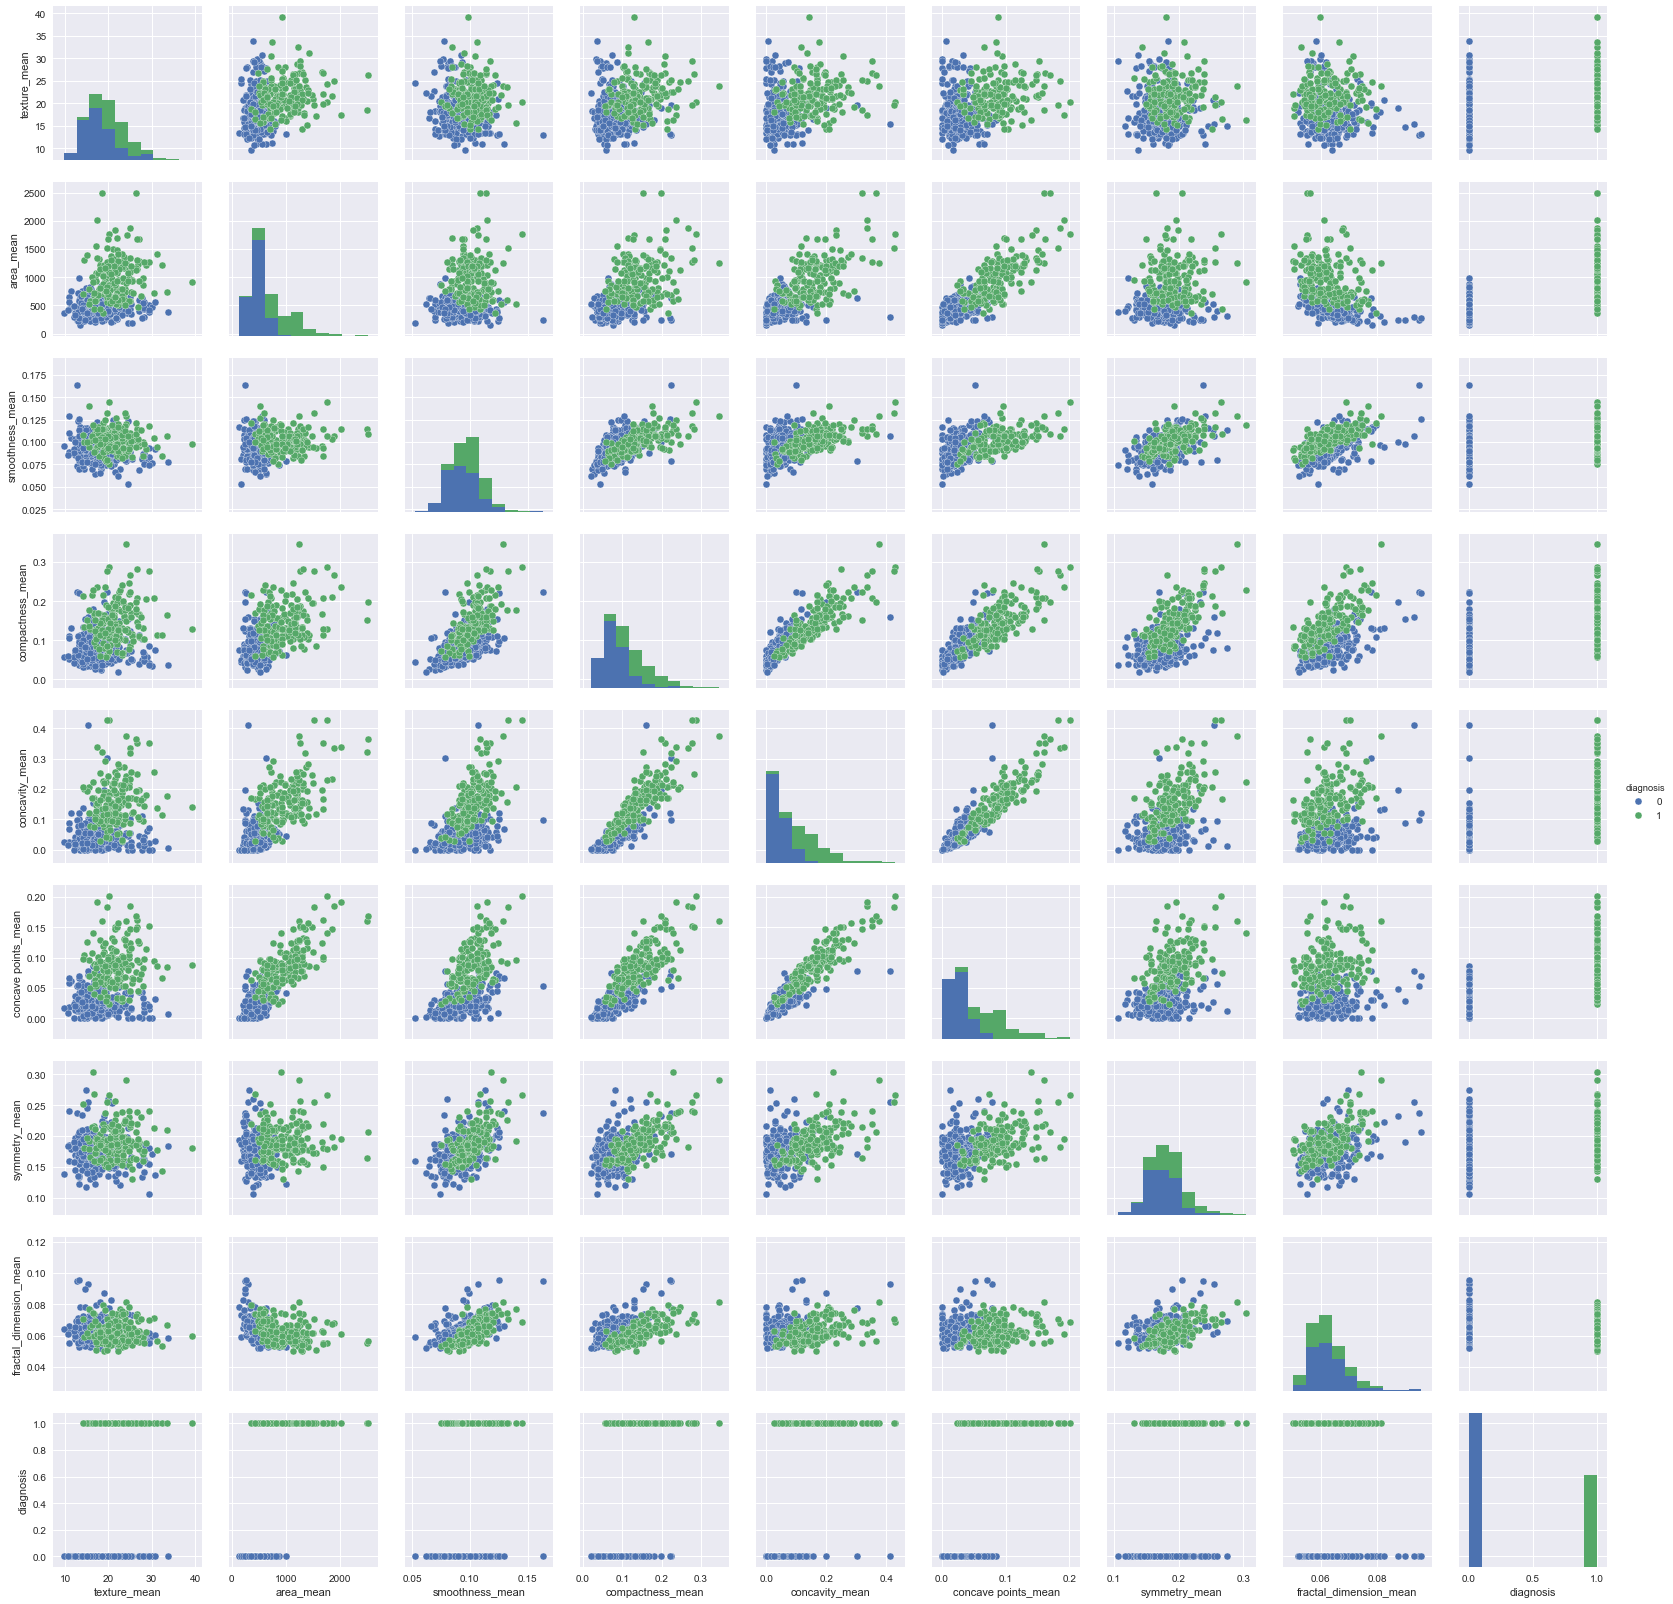

In [23]:
DCV = pd.concat((X_cv, y_cv), axis=1)
sns.pairplot(pd.concat([DCV.filter(regex='mean$'), y_cv],axis=1), hue='diagnosis')

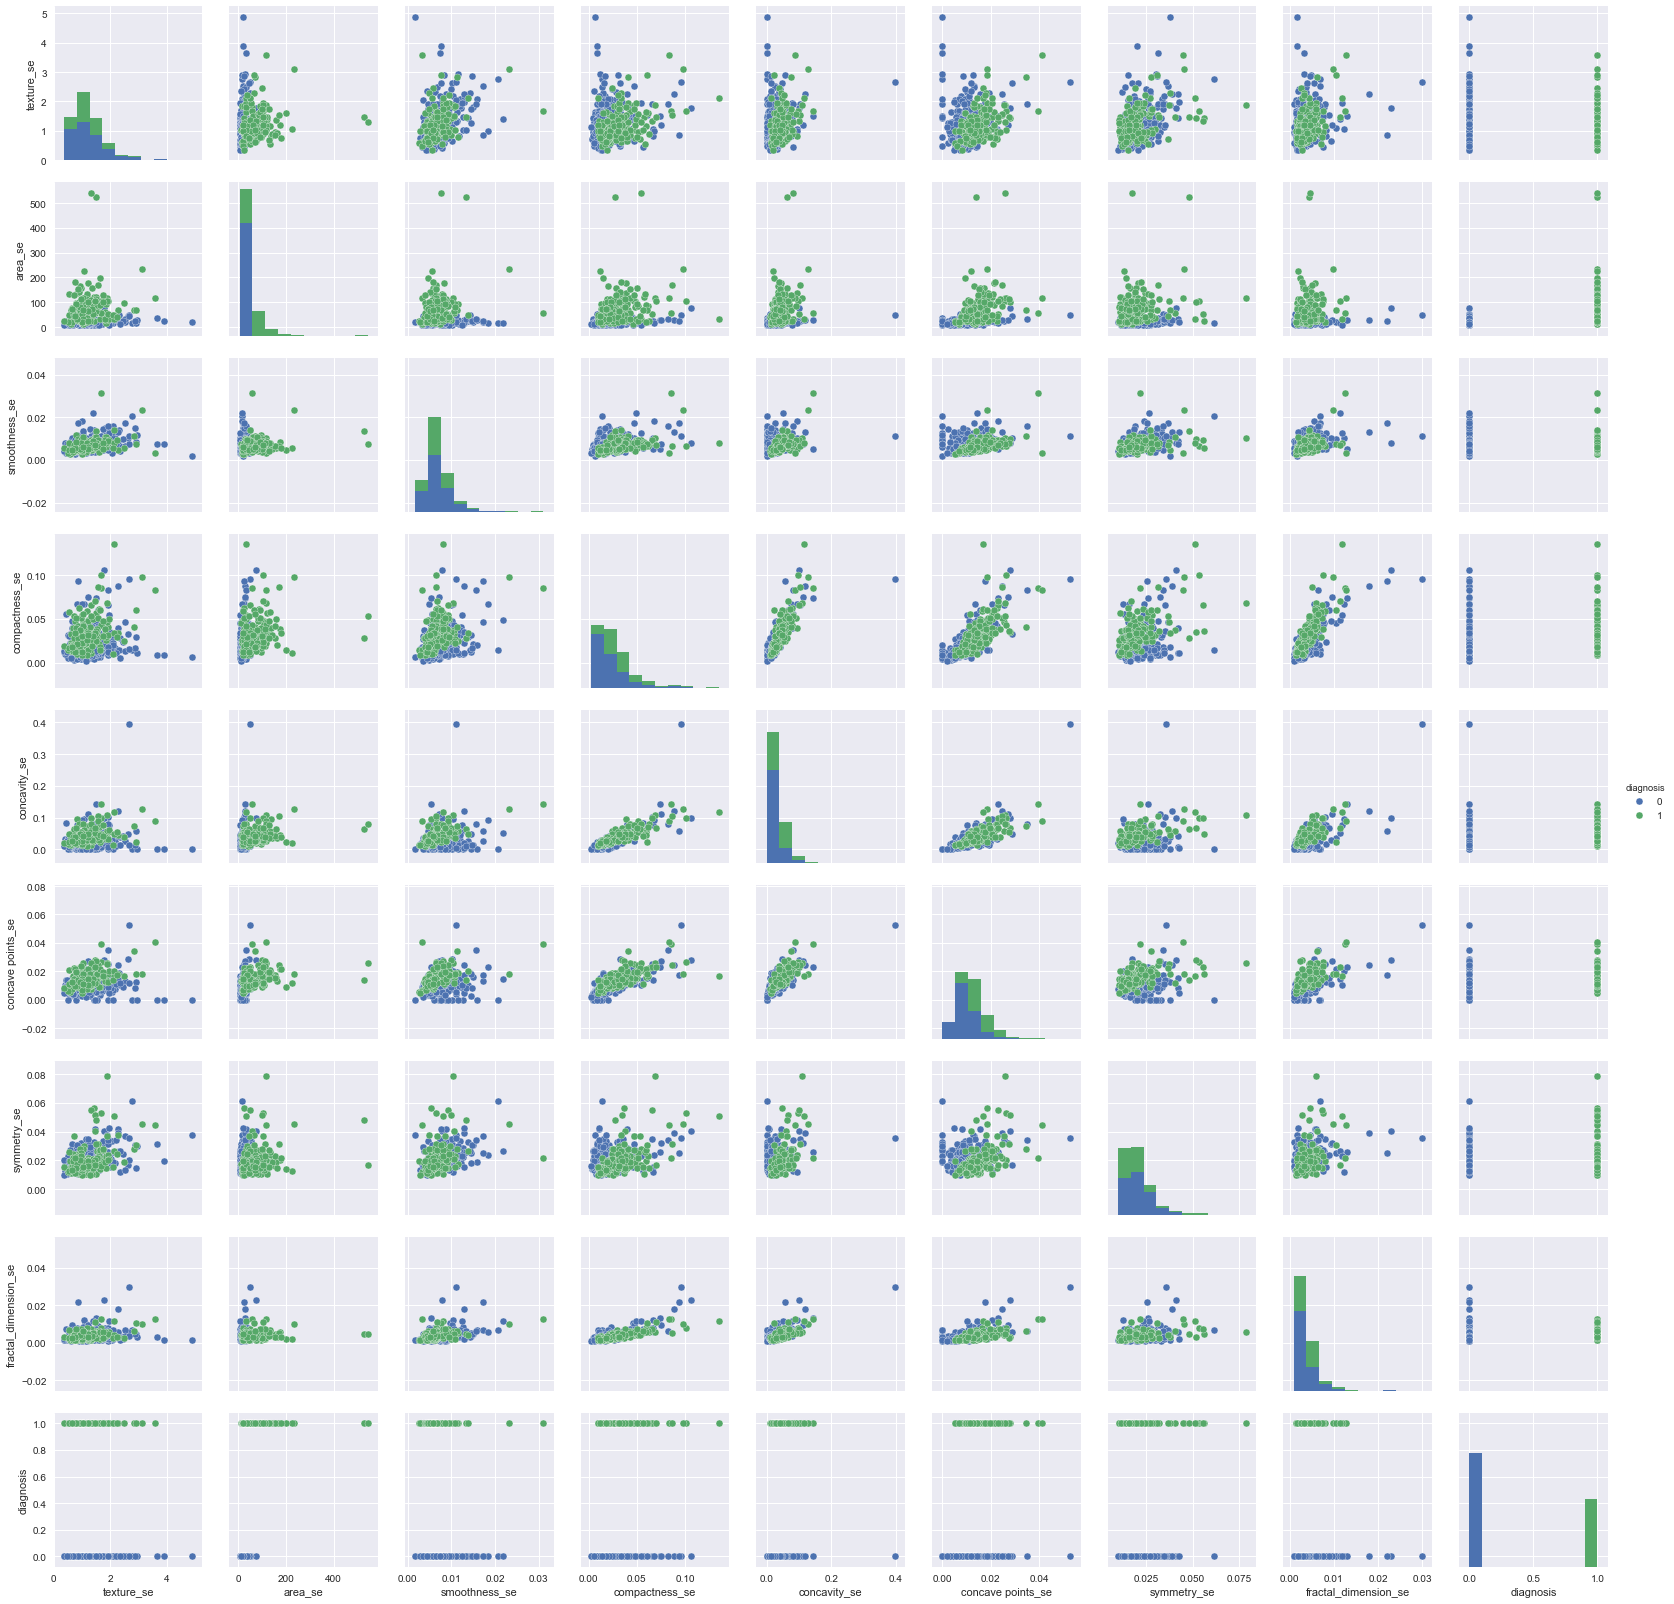

In [24]:
sns.pairplot(pd.concat([DCV.filter(regex='se$'), y_cv],axis=1), hue='diagnosis')

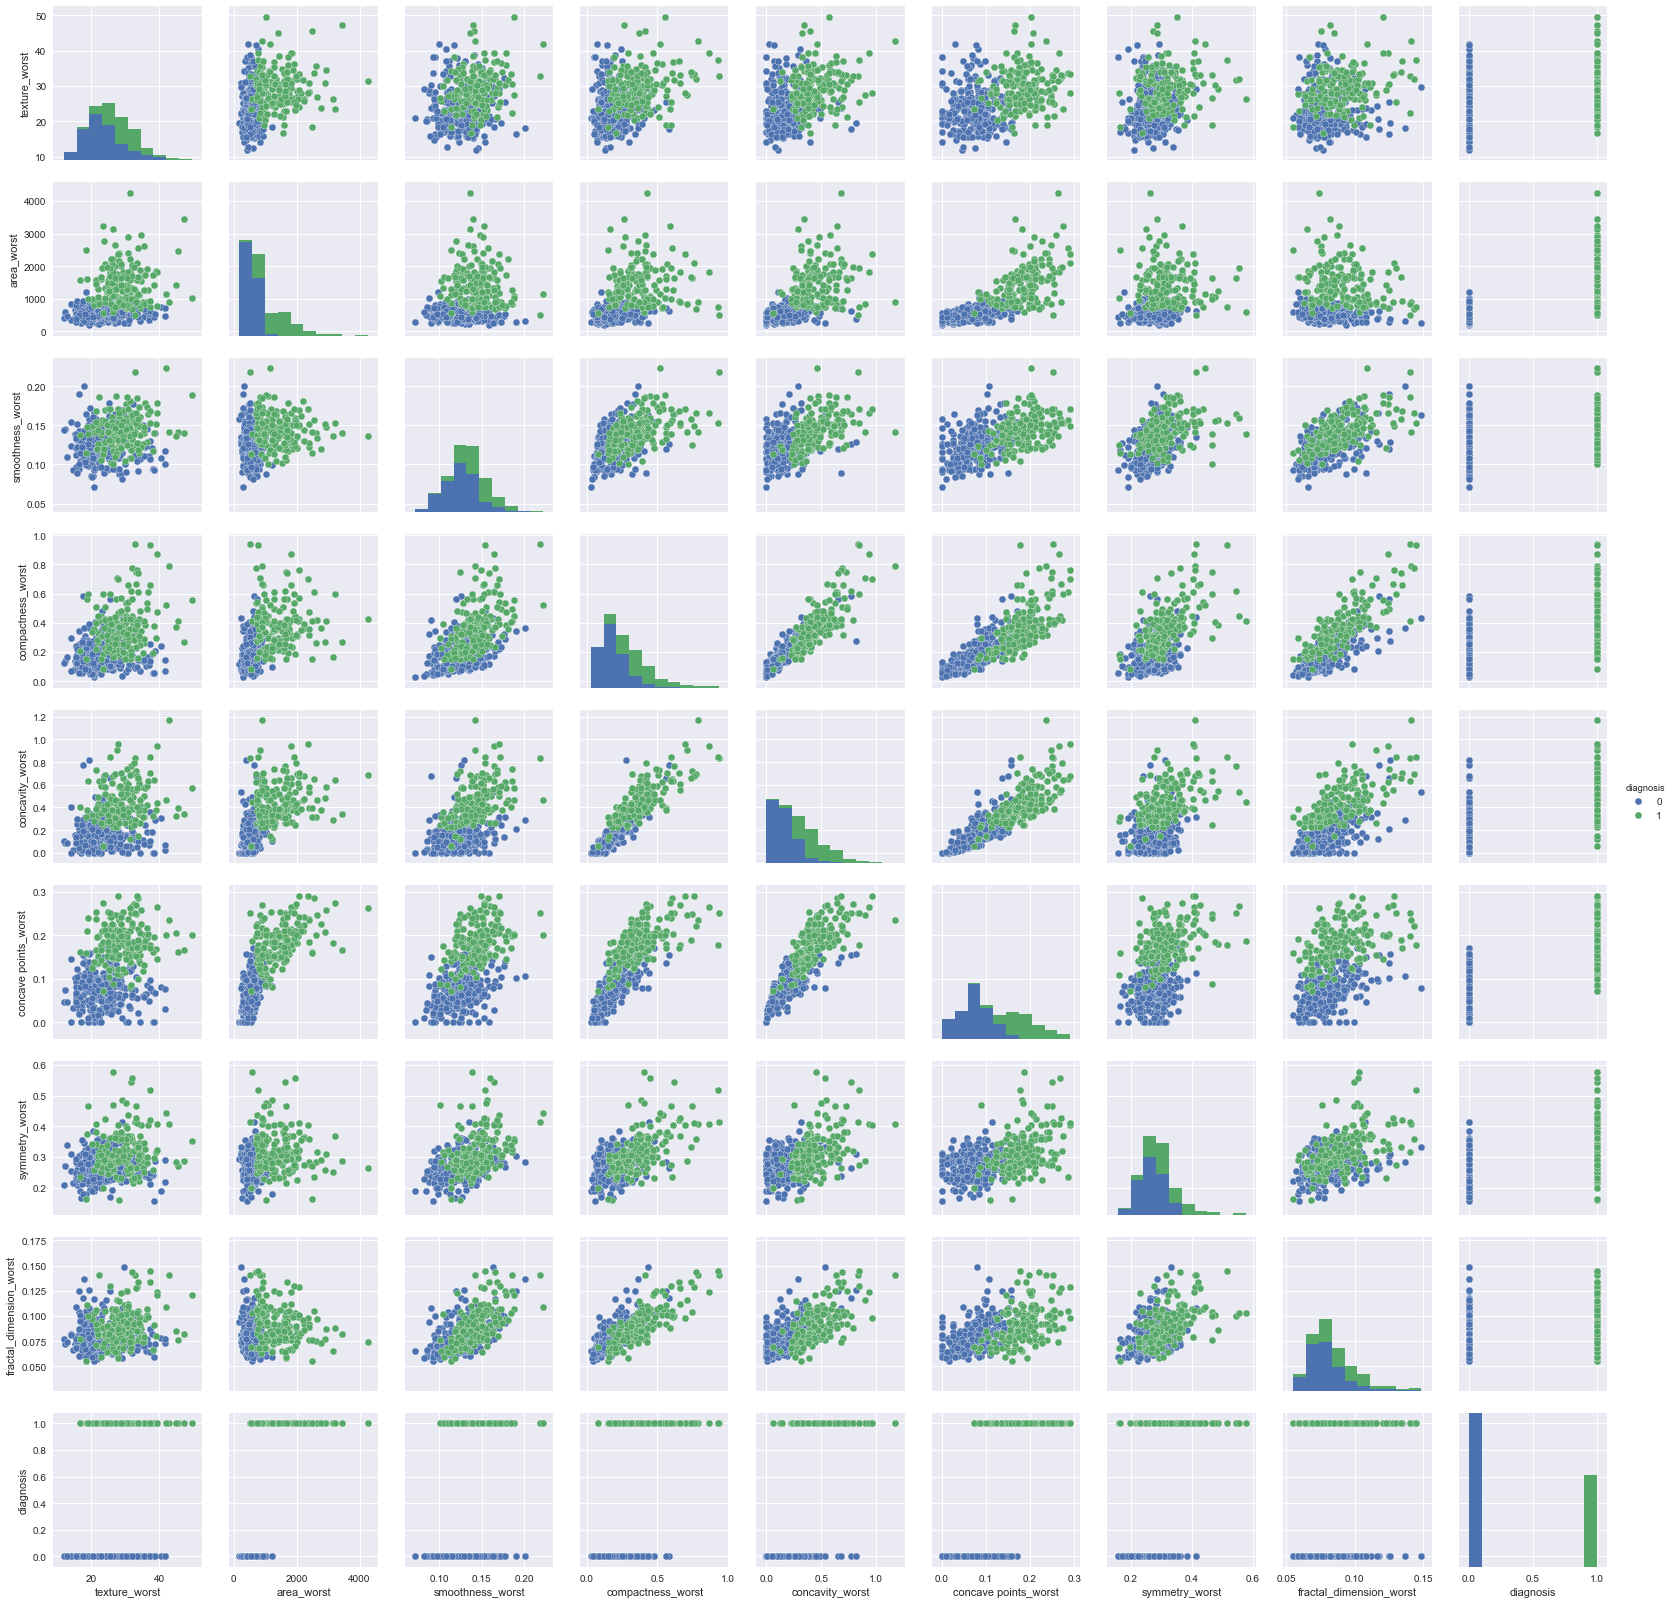

In [25]:
sns.pairplot(pd.concat([DCV.filter(regex='worst$'), y_cv],axis=1), hue='diagnosis')